# Tutorial 7: Sweeping through variuables with `simtask`
Original authors: Joe Manning (joseph.manning{at}manchester.ac.uk) and Tom L. Underwood (tlu20{at}bath.ac.uk)

## Introduction

Tutorial 6 demonstrated how `simtask` could be used to calculate the value and uncertainty of an observable automatically at a given set of thermodynamic conditions: the energy and density was calculated at a specified chemical potential and temperature. We will now go further, automating the calculation of the energy and density at *many* temperatures.
The relevant `simtask` class is `MeasurementSweep`, which performs sets of simulations similar to that performed by `Measurement` at a list of different *control parameters*.

Similarly to `Measurement`, to invoke the task corresponding to a `MeasurementSweep` object `sweep` the command is

```python
sweep.run()
```

However, first one must create the object `sweep`, parameterised appropriately for the task at hand.

## `Simtask` setup

We'll set up simtask as we did before:

In [1]:
import dlmontepython.simtask.dlmonteinterface as interface
import dlmontepython.simtask.measurement as measurement
import dlmontepython.simtask.analysis as analysis
import dlmontepython.simtask.task as task

# The line below creates a DL_MONTE-specific interface. Note that the interface 
# must know the location of the DL_MONTE executable - which is specified as the 
# argument to the DLMonteInterface constructor.
# You will have to adapt the location of the executable to suit your local system.

interface = interface.DLMonteInterface("DLMONTE-SRL.X")

energy_obs = task.Observable( ("energy",) )
nmol_obs = task.Observable( ("nmol",1) )
observables = [ energy_obs, nmol_obs ]

precisions = { nmol_obs : 0.2 }

m_template = measurement.Measurement(interface, observables, maxsims=20, 
                                     precisions=precisions, outputdir='./fixedprecision')

### Defining the `MeasurementSweep`
New we have a template `Measurement` object invoked, we'll create a list of chemical potentials and create a `MeasurementSweep` to run through them.

In [2]:
molchempots = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

sweep = measurement.MeasurementSweep(param="molchempot", paramvalues=molchempots, 
                                     measurement_template=m_template, outputdir="isotherm_simulation")


## Running the isotherm

As mentioned above, the task is invoked via the command

```python
sweep.run()
```

#### Troubleshooting

If you encounter a problem with running the next block of code, one possible reason is that the path to the `DL_MONTE` executable used to initialise the `DLMonteInterface` object above does not exist, or is wrong.

Also, you may encounter issues running this next cell on windows, so I've provided a python script for you to run the same simulation on Linux as required and continue on below.


In [ ]:
import os
import shutil

os.chdir('./Tutorial_7_files/')
if os.path.exists('isotherm_simulation'):
    shutil.rmtree('isotherm_simulation')

sweep.run()

## Postprocessing and analysis
Just like how the `Measurement` object created "energy_converge.dat" and "nmol_1_converge.dat" in Tutorial 6, the `MeasurementSweep` object creates summary files called "energy_sweep.dat" and "nmol_1_sweep.dat", which provide the idata as a complete isotherm.

Text(0, 0.5, 'Molecules adsorbed (n/uc)')

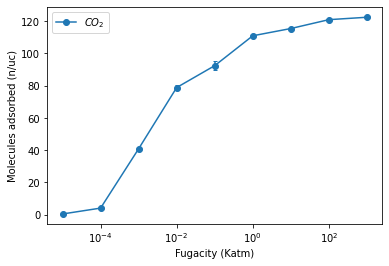

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

thing = pd.read_table('./Tutorial_7_files/isotherm_simulation/nmol_1_sweep.dat', header=None, sep=' ')
pd.DataFrame(thing).plot(x=0,y=1, yerr=2, capsize=2, marker='o', label='$CO_2$')
plt.xscale('log')
plt.xlabel('Fugacity (Katm)')
plt.ylabel('Molecules adsorbed (n/uc)')

## More advanced use
As I'm sure you can imagine, there are a lot of parameters you'll be able to sweep through using `simtask`. 
From the documentation, you can an alter any parameter in the `MainBlock` or the `molchempot` of the first species in an GCMC insert move.
While you can only modify one parameter at a time, I'm sure it'd be possible to do nested loops across different `Measurement` templates e.g. for sequentially running isotherms at different temperatures. 
Why not give them a try as an extra challenge? 
Can you calculate the isosteric heat for $CO_2$ in this zeolite?